PROBLEM SET 4, MRIDUL HARISH, CED18I034

In [38]:
import pandas as pd
from sklearn.preprocessing import Binarizer, OneHotEncoder

In [4]:
df = pd.read_csv('Avocado Dataset.csv')
df1 = pd.read_csv('Trail.csv')

Question 1 - Select a subset of relevant attributes from the given dataset that are necessary to know about the total volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) which are of organic type. (Use AVOCADO
dataset)

In [5]:
v4046 = df.groupby('type')['4046'].sum()
v4225 = df.groupby('type')['4225'].sum()
v4770 = df.groupby('type')['4770'].sum()

In [6]:
print("Volume of organic avocado sold with PLU of 4046: {}".format(v4046['organic']))
print("Volume of organic avocado sold with PLU of 4225: {}".format(v4225['organic']))
print("Volume of organic avocado sold with PLU of 4770: {}".format(v4770['organic']))

Volume of organic avocado sold with PLU of 4046: 66702877.38999989
Volume of organic avocado sold with PLU of 4225: 140603877.57000032
Volume of organic avocado sold with PLU of 4770: 2429040.549999998


Question 2 - Discard all duplicate entries in the dataset given and fill all the missing values in the attribute “AveragePrice” as 1.25. Also print the size of the dataset before and after removing duplicates. (Use Trail dataset)

In [7]:
before = df1.shape[0]
df1.drop_duplicates(inplace=True)
after = df1.shape[0]
print("Number of duplicate rows removed: {}".format(before - after))

Number of duplicate rows removed: 7


In [8]:
before = df1.AveragePrice.isna().sum()
df1.AveragePrice.fillna(1.25, inplace=True)
after = df1.AveragePrice.isna().sum()
print("Number of missing values filled: {}".format(before - after))

Number of missing values filled: 24


Question 3 - Binarize the attribute “Year”. Set the threshold above 2016 and print it without truncation. (Use AVOCADO dataset)

In [9]:
years = df.year.values.reshape(1, -1)

print("Binarized data: {}".format(Binarizer(threshold=2016).fit_transform(years).tolist()[0]))

Binarized data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Question 4 - Transform all categorical attributes in the dataset AVOCADO using Integer Encoding.

In [10]:
df["type"] = df.type.astype('category')
df["region"] = df.region.astype('category')

In [11]:
df.dtypes

Date              object
AveragePrice      object
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type            category
year               int64
region          category
dtype: object

In [12]:
print("The categorical attributes in the dataset are as follows: {}".format(df.select_dtypes(include=['category']).columns.tolist()))

The categorical attributes in the dataset are as follows: ['type', 'region']


In [13]:
intEncoding = {}
regions = list(df.region.unique())
intEncoding["region"] = {i: regions.index(i) for i in regions}
types = list(df.type.unique())
intEncoding["type"] = {i: types.index(i) for i in types}

print("The integer encoding for the categorical attributes is as follows: {}".format(intEncoding))

The integer encoding for the categorical attributes is as follows: {'region': {'Albany': 0, 'Atlanta': 1, 'BaltimoreWashington': 2, 'Boise': 3, 'Boston': 4, 'BuffaloRochester': 5, 'California': 6, 'Charlotte': 7, 'Chicago': 8, 'CincinnatiDayton': 9, 'Columbus': 10, 'DallasFtWorth': 11, 'Denver': 12, 'Detroit': 13, 'GrandRapids': 14, 'GreatLakes': 15, 'HarrisburgScranton': 16, 'HartfordSpringfield': 17, 'Houston': 18, 'Indianapolis': 19, 'Jacksonville': 20, 'LasVegas': 21, 'LosAngeles': 22, 'Louisville': 23, 'MiamiFtLauderdale': 24, 'Midsouth': 25, 'Nashville': 26, 'NewOrleansMobile': 27, 'NewYork': 28, 'Northeast': 29, 'NorthernNewEngland': 30, 'Orlando': 31, 'Philadelphia': 32, 'PhoenixTucson': 33, 'Pittsburgh': 34, 'Plains': 35, 'Portland': 36, 'RaleighGreensboro': 37, 'RichmondNorfolk': 38, 'Roanoke': 39, 'Sacramento': 40, 'SanDiego': 41, 'SanFrancisco': 42, 'Seattle': 43, 'SouthCarolina': 44, 'SouthCentral': 45, 'Southeast': 46, 'Spokane': 47, 'StLouis': 48, 'Syracuse': 49, 'Tampa'

In [14]:
df = df.replace(intEncoding)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


Question 5 - Transform the attribute = “Region” in the given dataset AVOCADO using One-Hot Encoding.

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')

dfEnc = pd.DataFrame(enc.fit_transform(df[['region']]).toarray())
dfMerge = df.join(dfEnc)

dfMerge.columns

Index([        'Date', 'AveragePrice', 'Total Volume',         '4046',
               '4225',         '4770',   'Total Bags',   'Small Bags',
         'Large Bags',  'XLarge Bags',         'type',         'year',
             'region',              0,              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15,             16,             17,             18,
                   19,             20,             21,             22,
                   23,             24,             25,             26,
                   27,             28,             29,             30,
                   31,             32,             33,             34,
                   35,             36,             37,             38,
                   39,             40,             41,             42,
      

Question 6 - Ignore the tuples that hold missing values and print the subset of data from AVOCADO dataset excluding “NaN” values.

In [16]:
dfCleaned = df.dropna()
dfCleaned

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


Question 7 - Drop the attribute that has high nullity as it facilitates efficient prediction. (Use AVOCADO dataset)

In [17]:
df.isnull().sum()

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

In [28]:
df_drop = df.dropna(axis=1, how='any', inplace=False)
df_drop.isnull().sum()

Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Question 8 - Study the entire dataset and report the complete statistical summary about the data (Use AVOCADO dataset)
• Dimension of the dataset

• Most frequently occurring value under every attribute.

• Datatype of every attribute

• Count

• Mean

• Standard Deviation

• Minimum Value

• Maximum value

• 25% o

• Median i.e. 50%

• 75%

• Find whether the class distribution of dataset is imbalanced. (Note: Fix the class label as “Type” in the given dataset)

• Correlation matrix

• Skewness of every attribute.

(For the below exercises, you are free to choose an appropriate data set as merited by the problem statements)

In [18]:
df.shape

(18250, 13)

In [19]:
dict(zip(df.columns, df.value_counts().idxmax()))

{'Date': '18-03-2018',
 'AveragePrice': '1.56',
 'Total Volume': 15896.38,
 '4046': 2055.35,
 '4225': 1499.55,
 '4770': 0.0,
 'Total Bags': 12341.48,
 'Small Bags': 12114.81,
 'Large Bags': 226.67,
 'XLarge Bags': 0.0,
 'type': 1,
 'year': 2018,
 'region': 53}

In [20]:
df.dtypes

Date             object
AveragePrice     object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

In [21]:
df.count()

Date            18250
AveragePrice    18222
Total Volume    18250
4046            18250
4225            18250
4770            18250
Total Bags      18250
Small Bags      18250
Large Bags      18250
XLarge Bags     18250
type            18250
year            18250
region          18250
dtype: int64

In [22]:
df.select_dtypes(include=['float64']).mean()

Total Volume    850598.273413
4046            292992.481896
4225            295138.477670
4770             22838.484500
Total Bags      239626.747390
Small Bags      182185.367250
Large Bags       54335.123135
XLarge Bags       3106.256292
dtype: float64

In [23]:
df.select_dtypes(include=['float64']).std()

Total Volume    3.453456e+06
4046            1.264956e+06
4225            1.204089e+06
4770            1.074613e+05
Total Bags      9.862168e+05
Small Bags      7.461591e+05
Large Bags      2.439596e+05
XLarge Bags     1.769242e+04
dtype: float64

In [24]:
df.select_dtypes(include=['float64']).min()

Total Volume    84.56
4046             0.00
4225             0.00
4770             0.00
Total Bags       0.00
Small Bags       0.00
Large Bags       0.00
XLarge Bags      0.00
dtype: float64

In [25]:
df.select_dtypes(include=['float64']).max()

Total Volume    62505646.52
4046            22743616.17
4225            20470572.61
4770             2546439.11
Total Bags      19373134.37
Small Bags      13384586.80
Large Bags       5719096.61
XLarge Bags       551693.65
dtype: float64

In [26]:
df.select_dtypes(include=['float64']).quantile([0.25, 0.5, 0.75])

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0.25,10839.6275,854.2100,3008.0975,0.000,5089.0825,2850.3225,127.580,0.0000
0.50,107365.5050,8643.2000,29058.8750,184.975,39741.1800,26351.6150,2647.270,0.0000
0.75,432952.6650,111008.7125,150166.3350,6242.055,110781.1150,83336.2100,22018.275,132.4325


In [27]:
counts = df['type'].value_counts()

print("The distribution of the types of avocado sold is as follows: {}".format(counts))

The distribution of the types of avocado sold is as follows: 0    9126
1    9124
Name: type, dtype: int64


Question 9 - Test drive the use of Gini Index, Information Gain, Entropy and other measures that are supported in your platform, performing the role of data selection.

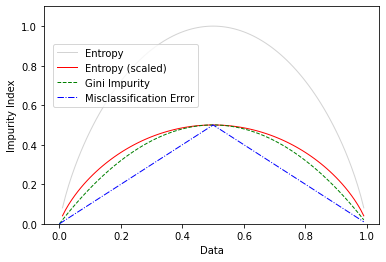

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85), ncol=1, fancybox=True, shadow=False)

plt.ylim([0, 1.1])
plt.xlabel('Data')
plt.ylabel('Impurity Index')
plt.show()

Question 10 - Test drive the implementation support in your platform of choice for data preprocessing phases such as cleaning, selection, transformation, integration in addition to the earlier exercises.


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [32]:
df3 = pd.read_csv('auto.csv')
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [33]:
df3.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
modelyear       0
origin          0
car name        0
dtype: int64

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df3.iloc[:, 1:7])
df3.iloc[:, 1:7] = imputer.transform(df3.iloc[:, 1:7])
df3.iloc[330]

mpg                             40.9
cylinders                        4.0
displacement                    85.0
horsepower                104.469388
weight                        1835.0
acceleration                    17.3
modelyear                       80.0
origin                             2
car name        renault lecar deluxe
Name: 330, dtype: object

In [35]:
sc = StandardScaler(with_mean=False)
df3_stand = sc.fit_transform(df3.drop(['car name'], axis=1))
df3_stand = pd.DataFrame(df3_stand, columns=df3.columns.tolist()[:-1])
df3_stand

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,2.305872,4.709024,2.947990,3.407497,4.142935,4.356947,18.95489,1.248367
1,1.921560,4.709024,3.360900,4.324900,4.366398,4.175407,18.95489,1.248367
2,2.305872,4.709024,3.053618,3.931728,4.062535,3.993868,18.95489,1.248367
3,2.049664,4.709024,2.919182,3.931728,4.058988,4.356947,18.95489,1.248367
4,2.177768,4.709024,2.899977,3.669612,4.077906,3.812328,18.95489,1.248367
...,...,...,...,...,...,...,...,...
393,3.458807,2.354512,1.344360,2.254190,3.298741,5.664031,22.20430,1.248367
394,5.636575,2.354512,0.931450,1.362999,2.518394,8.931741,22.20430,2.496734
395,4.099327,2.354512,1.296347,2.201767,2.713480,4.211715,22.20430,1.248367
396,3.586911,2.354512,1.152309,2.070710,3.103654,6.753267,22.20430,1.248367


In [36]:
nm = Normalizer()
df3_norm = nm.fit_transform(df3_stand)
df3_norm = pd.DataFrame(df3_norm)
df3_norm

,0,1,2,3,4,5,6,7
0,0.109335,0.223283,0.139782,0.161570,0.196441,0.206589,0.898763,0.059192
1,0.090261,0.221197,0.157872,0.203154,0.205103,0.196132,0.890369,0.058640
2,0.109238,0.223085,0.144662,0.186261,0.192458,0.189205,0.897967,0.059140
3,0.096983,0.222814,0.138125,0.186035,0.192056,0.206155,0.896876,0.059068
4,0.103726,0.224289,0.138125,0.174783,0.194229,0.181580,0.902816,0.059459
...,...,...,...,...,...,...,...,...
393,0.145908,0.099324,0.056711,0.095092,0.139155,0.238934,0.936675,0.052662
394,0.225387,0.094149,0.037245,0.054502,0.100702,0.357149,0.887872,0.099836
395,0.175024,0.100528,0.055349,0.094006,0.115854,0.179822,0.948030,0.053300
396,0.149734,0.098288,0.048103,0.086441,0.129561,0.281912,0.926907,0.052112


In [37]:
disc = KBinsDiscretizer(n_bins=6, encode='ordinal',strategy='uniform')
df3_disc = pd.DataFrame(disc.fit_transform(df3_norm), columns=df3.columns.tolist()[:-1])
df3_disc

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,1.0,5.0,3.0,2.0,3.0,1.0,2.0,0.0
1,1.0,5.0,4.0,4.0,3.0,1.0,2.0,0.0
2,1.0,5.0,4.0,3.0,3.0,1.0,2.0,0.0
3,1.0,5.0,3.0,3.0,3.0,1.0,2.0,0.0
4,1.0,5.0,3.0,3.0,3.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...
393,2.0,0.0,0.0,1.0,1.0,2.0,5.0,0.0
394,5.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0
395,3.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0
396,2.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0
